# <span style = "background-color: #FFDDDD"> 프로젝트 1: Image Classification</span>

---
## <span style = "background-color: #FFFFDD"> 🐶 Environment Settings</span>

### <span style = "background-color: #F0E9FF"> 1. Import libraries & packages </span>

In [1]:
# dataset path
import os

# data array
import numpy as np

# visualization
import matplotlib.pyplot as plt

# machine learning
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.utils as utils
import tensorflow.keras.layers as layers

# load dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### <span style = "background-color: #F0E9FF"> 2. Define constants</span>

In [2]:
DATASET_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

In [3]:
CAT = 0
DOG = 1

IMG_SIZE = 256

In [4]:
# model training configurations
BATCH_SIZE = 16
EPOCHS = 5

### <span style = "background-color: #F0E9FF"> 3. Define frequently used methods</span>

In [5]:
DIVIDER_LENGTH = 80

def print_single_divider(length = DIVIDER_LENGTH):
    print("-" * DIVIDER_LENGTH)

def print_double_divider(length = DIVIDER_LENGTH):
    print("=" * DIVIDER_LENGTH)

### <span style = "background-color: #F0E9FF"> 4. Check GPU settings</span>

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

---
## <span style = "background-color: #FFFFDD"> 🐶 Data Preparation</span>

### <span style = "background-color: #F0E9FF"> 1. Indicate paths for dataset</span>

In [7]:
dataset_path_to_zip = utils.get_file("cats_and_dogs.zip", origin=DATASET_URL, extract=True)

In [8]:
dataset_path = os.path.join(os.path.dirname(dataset_path_to_zip), "cats_and_dogs_filtered")

In [9]:
# directory path for whole training image dataset
ds_train_path = os.path.join(dataset_path, "train")

# directory path for training cat image data
ds_train_cats_path = os.path.join(ds_train_path, "cats")

# directory path for training dog image data
ds_train_dogs_path = os.path.join(ds_train_path, "dogs")


print("> Paths for training dataset indicated successfully!")
print_double_divider()
print(">>> Path for whole training data   : ", ds_train_path)
print_single_divider()
print(">>> Path for cats training data    : ", ds_train_cats_path)
print(">>> Path for dogs training data    : ", ds_train_dogs_path)

> Paths for training dataset indicated successfully!
>>> Path for whole training data   :  /aiffel/.keras/datasets/cats_and_dogs_filtered/train
--------------------------------------------------------------------------------
>>> Path for cats training data    :  /aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
>>> Path for dogs training data    :  /aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [10]:
# directory path for whole validation image dataset
ds_val_path = os.path.join(dataset_path, "validation")

# directory path for validation cat image data
ds_val_cats_path = os.path.join(ds_val_path, "cats")

# directory path for validation dog image data
ds_val_dogs_path = os.path.join(ds_val_path, "dogs")


print("> Paths for validation dataset indicated successfully!")
print_double_divider()
print(">>> Path for whole validation data : ", ds_val_path)
print_single_divider()
print(">>> Path for cats validation data  : ", ds_val_cats_path)
print(">>> Path for dogs validation data  : ", ds_val_dogs_path)

> Paths for validation dataset indicated successfully!
>>> Path for whole validation data :  /aiffel/.keras/datasets/cats_and_dogs_filtered/validation
--------------------------------------------------------------------------------
>>> Path for cats validation data  :  /aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
>>> Path for dogs validation data  :  /aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


### <span style = "background-color: #F0E9FF"> 2. Check the number of data samples</span>

In [11]:
# total number of samples for training cat image data
total_train_cats_samples = len(os.listdir(ds_train_cats_path))

# total number of samples for training dog image data
total_train_dogs_samples = len(os.listdir(ds_train_dogs_path))

# total number of samples for whole training image dataset
total_train_samples = total_train_cats_samples + total_train_dogs_samples


print("> Training data samples are found successfully!")
print_double_divider()
print(">>> Total numbers of whole training data samples   : ", total_train_samples)
print_single_divider()
print(">>> Total numbers of cats training data samples    : ", total_train_cats_samples)
print(">>> Total numbers of dogs training data samples    : ", total_train_dogs_samples)

> Training data samples are found successfully!
>>> Total numbers of whole training data samples   :  2000
--------------------------------------------------------------------------------
>>> Total numbers of cats training data samples    :  1000
>>> Total numbers of dogs training data samples    :  1000


In [12]:
# total number of samples for validation cat image data
total_val_cats_samples = len(os.listdir(ds_val_cats_path))

# total number of samples for validation dog image data
total_val_dogs_samples = len(os.listdir(ds_val_dogs_path))

# total number of samples for whole training image dataset
total_val_samples = total_val_cats_samples + total_val_dogs_samples


print("> Validation data samples are found successfully!")
print_double_divider()
print(">>> Total numbers of whole validation data samples : ", total_val_samples)
print_single_divider()
print(">>> Total numbers of cats validation data samples  : ", total_val_cats_samples)
print(">>> Total numbers of dogs validation data samples  : ", total_val_dogs_samples)

> Validation data samples are found successfully!
>>> Total numbers of whole validation data samples :  1000
--------------------------------------------------------------------------------
>>> Total numbers of cats validation data samples  :  500
>>> Total numbers of dogs validation data samples  :  500


### <span style = "background-color: #F0E9FF"> 3. Generate augmented data</span>

**💡 ImageDataGenerator를 통한 데이터 생성 결과물**

```
image_data_generator = ImageDataGenerator()
outputs = img_data_generator.flow_from_directory(batch_size=BATCH_SIZE, directory=PATH, ...)
```
... 라고 할 때


-  `outputs[n]`       : dataset samples를 batch_size 단위로 나누었을 때, n번째 samples 묶음 (`train_data_get[0]` : 0~15번째 data samples)

- `outputs[n][0]`    : n번째 samples 묶음의 이미지
- `outputs[n][0][m]` : n번째 samples 묶음 내의 m번째 sample의 이미지

- `outputs[n][1]`    : n번째 samples 묶음의 라벨
- `outputs[n][1][m]` : n번째 samples 묶음 내의 m번째 sample의 라벨



예를 들면 ...
```
print(outputs[0][0].shape)       # (BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3)
print(outputs[0][0][0].shape)    # (IMG_SIZE, IMG_SIZE, 3)
print(outputs[0][1].shape)       # (BATCH_SIZE,)
print(outputs[0][1][0])          # 라벨값 출력
```

**3-1. Load train data using `ImageDataGenerator` instance**

In [13]:
# image data generator for train dataset (augmentation adopted)
img_gen_train = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.3,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=False)


# generate train image dataset
ds_train = img_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                             directory=ds_train_path,
                                             shuffle=True,
                                             target_size=(IMG_SIZE, IMG_SIZE),
                                             class_mode="binary")

Found 2000 images belonging to 2 classes.


**3-2. Load validation data using `ImageDataGenerator` instance**

In [14]:
# image data generator for validation dataset (no augmentation, normalization only)
img_gen_val = ImageDataGenerator(rescale=1./255)

ds_val= img_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                        directory=ds_val_path,
                                        target_size=(IMG_SIZE, IMG_SIZE),
                                        class_mode="binary")

Found 1000 images belonging to 2 classes.


### <span style = "background-color: #F0E9FF"> 4. Preview image data samples</span>

**4-1. Define methods to visualize image & label data samples**

In [15]:
def preview_five_img(img_data_samples):
    fig = plt.figure(figsize=(15,4))
    
    for i in range(5):
        label_value = int(img_data_samples[1][i])
        label_str = "CAT"
        if label_value == DOG:
            label_str = "DOG"
        
        ax = fig.add_subplot(1, 5, i+1)
        ax.imshow(img_data_samples[0][i])
        ax.set_title(label_str)
        ax.axis("off")
        
    fig.tight_layout()
    fig.show()

**4-2. Visualize training data samples** 

> Preview of image data samples from training dataset :


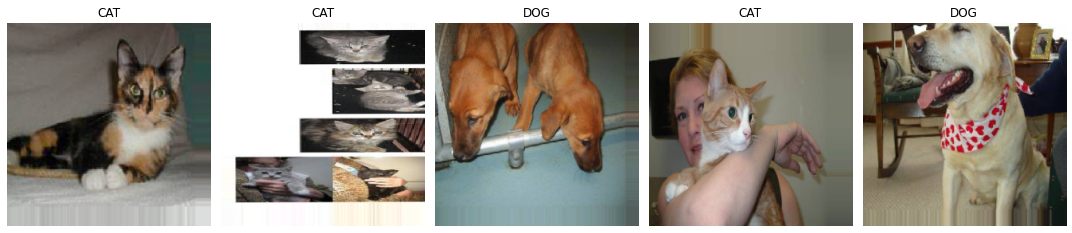

In [16]:
print("> Preview of image data samples from training dataset :")
preview_five_img(ds_train[0])

**4-3. Visualize validation data samples**

> Preview of image data samples from validation dataset :


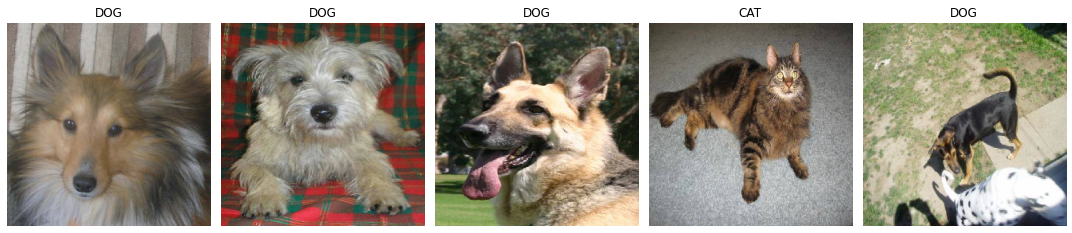

In [17]:
print("> Preview of image data samples from validation dataset :")
preview_five_img(ds_val[0])

---
## <span style = "background-color: #FFFFDD"> 🐶 Model Preparation</span>

### <span style = "background-color: #F0E9FF"> 1. Prepare ground-truth model</span>

**1-1. Design ground-truth model structure (original VGG-16)**

In [18]:
def get_vgg16_model(input_shape=(IMG_SIZE, IMG_SIZE, 3)):

    # input layer
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
    x = layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(1000, activation='relu')(x)
    
    # output layer
    out_layer = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
    return model

**1-2. Generate ground-truth model instance (original VGG-16)**

In [19]:
vgg16_model = get_vgg16_model()
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

### <span style = "background-color: #F0E9FF"> 2. Prepare new trial model</span>

**2-1. Design new trial model structure (ResNet-18)**

In [20]:
def residual_block(x, filters, strides=1):
    
    y = layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('relu')(y)
    
    y = layers.Conv2D(filters, kernel_size=3, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # fit tensor shape when strides != 1
    if strides != 1 or x.shape[-1] != filters:
        x = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
        x = layers.BatchNormalization()(x)

    y = layers.Add()([x, y])
    y = layers.Activation('relu')(y)
    
    return y

In [21]:
def get_resnet18_model(input_shape=(IMG_SIZE, IMG_SIZE, 3)):

    # input layer
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # block 1
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    # block 2
    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128)

    # block 3
    x = residual_block(x, filters=256, strides=2)
    x = residual_block(x, filters=256)

    # block 4
    x = residual_block(x, filters=512, strides=2)
    x = residual_block(x, filters=512)

    x = layers.GlobalAveragePooling2D()(x)
    
    # output layer
    out_layer = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])   
    return model

**2-2. Generate new trial model instance (ResNet-18)**

In [22]:
resnet18_model = get_resnet18_model()
resnet18_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 128, 128, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d_13[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 64) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

---
## <span style = "background-color: #FFFFDD"> 🐶 Experiments</span>

### <span style = "background-color: #F0E9FF"> 1. Define methods to visualize model training history</span>

In [23]:
def visualize_training_history(history):
    # get training metrics
    acc = history.history["binary_accuracy"][1:]
    val_acc = history.history["val_binary_accuracy"][1:]
    loss = history.history["loss"][1:]
    val_loss = history.history["val_loss"][1:]

    epochs_range = range(2, len(acc)+2) # ignore evaluation at first epoch 

    
    
    # visualize training metrics
    fig = plt.figure(figsize=(15, 7))
    
    ax_acc = fig.add_subplot(1, 2, 1)
    ax_acc.plot(epochs_range, acc, color="lightpink", label="training")
    ax_acc.plot(epochs_range, val_acc, color="palevioletred", label="validation")
    ax_acc.set_title("A C C U R A C Y")
    ax_acc.set_xlabel("epoch")
    ax_acc.set_ylabel("accuracy")
    ax_acc.grid()
    ax_acc.legend()

    ax_loss = fig.add_subplot(1, 2, 2)
    ax_loss.plot(epochs_range, loss, color="thistle", label="training")
    ax_loss.plot(epochs_range, val_loss, color="orchid", label="validation")
    ax_loss.set_title("L O S S")
    ax_loss.set_xlabel("epoch")
    ax_loss.set_ylabel("loss")
    ax_loss.grid()
    ax_loss.legend()

    plt.show()

### <span style = "background-color: #F0E9FF"> 2. Train the ground-truth VGG-16 model</span>

In [24]:
vgg16_model.compile(loss=tf.keras.losses.binary_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=[tf.keras.metrics.binary_accuracy])

In [25]:
vgg16_history = vgg16_model.fit(ds_train,
                                steps_per_epoch=total_train_samples/BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=ds_val,
                                validation_freq=1)

Epoch 1/5
125/125 [==============================] - 51s 326ms/step - loss: 3321926.7500 - binary_accuracy: 0.5015 - val_loss: 0.6942 - val_binary_accuracy: 0.5110
Epoch 2/5
125/125 [==============================] - 38s 301ms/step - loss: 34.5301 - binary_accuracy: 0.4895 - val_loss: 1.6842 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 38s 302ms/step - loss: 7.0799 - binary_accuracy: 0.4900 - val_loss: 0.7609 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 38s 300ms/step - loss: 0.7676 - binary_accuracy: 0.5060 - val_loss: 0.6952 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 38s 302ms/step - loss: 0.7395 - binary_accuracy: 0.5170 - val_loss: 0.6939 - val_binary_accuracy: 0.5000


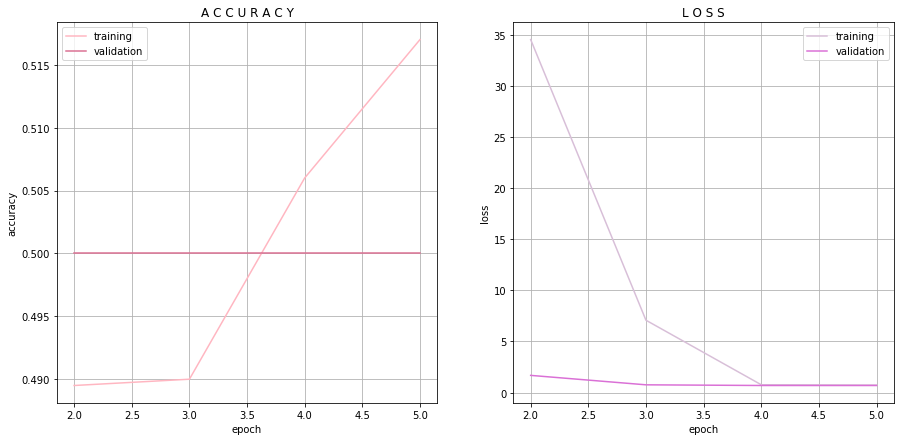

In [26]:
visualize_training_history(vgg16_history)

### <span style = "background-color: #F0E9FF"> 3. Train the new trial ResNet-18 model</span>

In [27]:
resnet18_model.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=[tf.keras.metrics.binary_accuracy])

In [28]:
resnet18_history = resnet18_model.fit(ds_train,
                                      steps_per_epoch=total_train_samples/BATCH_SIZE,
                                      epochs=100,
                                      validation_data=ds_val,
                                      validation_freq=1)

Epoch 1/100
125/125 [==============================] - 39s 281ms/step - loss: 0.7942 - binary_accuracy: 0.5010 - val_loss: 41.0551 - val_binary_accuracy: 0.5000
Epoch 2/100
125/125 [==============================] - 34s 273ms/step - loss: 0.7509 - binary_accuracy: 0.5170 - val_loss: 1.0189 - val_binary_accuracy: 0.5560
Epoch 3/100
125/125 [==============================] - 34s 272ms/step - loss: 0.6993 - binary_accuracy: 0.5395 - val_loss: 0.7115 - val_binary_accuracy: 0.5220
Epoch 4/100
125/125 [==============================] - 34s 272ms/step - loss: 0.7096 - binary_accuracy: 0.5425 - val_loss: 0.7271 - val_binary_accuracy: 0.5300
Epoch 5/100
125/125 [==============================] - 34s 274ms/step - loss: 0.6939 - binary_accuracy: 0.5320 - val_loss: 1.2216 - val_binary_accuracy: 0.4590
Epoch 6/100
125/125 [==============================] - 34s 272ms/step - loss: 0.6931 - binary_accuracy: 0.5560 - val_loss: 0.6767 - val_binary_accuracy: 0.5510
Epoch 7/100
125/125 [==================

Epoch 52/100
125/125 [==============================] - 34s 272ms/step - loss: 0.5115 - binary_accuracy: 0.7545 - val_loss: 0.6391 - val_binary_accuracy: 0.6710
Epoch 53/100
125/125 [==============================] - 34s 273ms/step - loss: 0.5155 - binary_accuracy: 0.7505 - val_loss: 0.7886 - val_binary_accuracy: 0.5980
Epoch 54/100
125/125 [==============================] - 34s 271ms/step - loss: 0.4986 - binary_accuracy: 0.7580 - val_loss: 0.5092 - val_binary_accuracy: 0.7540
Epoch 55/100
125/125 [==============================] - 34s 272ms/step - loss: 0.5016 - binary_accuracy: 0.7545 - val_loss: 0.5046 - val_binary_accuracy: 0.7450
Epoch 56/100
125/125 [==============================] - 34s 271ms/step - loss: 0.4880 - binary_accuracy: 0.7790 - val_loss: 1.0554 - val_binary_accuracy: 0.5860
Epoch 57/100
125/125 [==============================] - 35s 275ms/step - loss: 0.4825 - binary_accuracy: 0.7770 - val_loss: 0.5482 - val_binary_accuracy: 0.7240
Epoch 58/100
125/125 [============

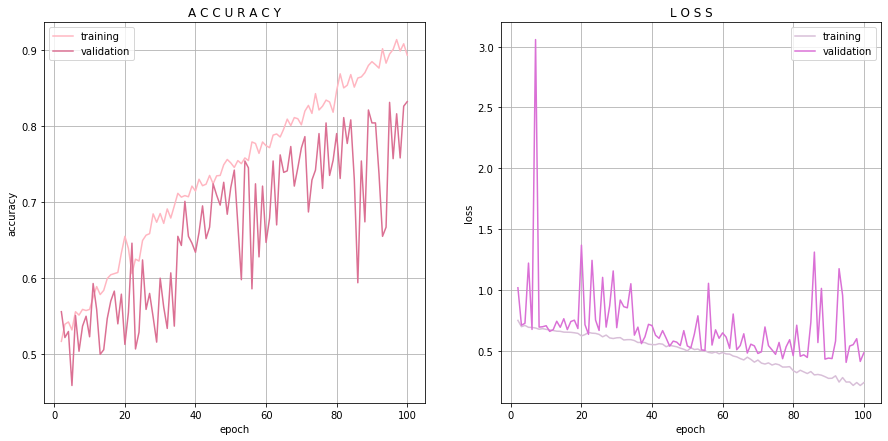

In [29]:
visualize_training_history(resnet18_history)

---
## <span style = "background-color: #FFFFDD"> 🐶 Conclusion</span>

**📝 실험결과 분석**
- VGG-16 모델의 경우 epoch 1~5까지 validation accuracy가 0.5000 으로 일관되게 유지되었다. (부가적으로 epochs=10 까지 학습을 돌려보았으나 validation accuracy의 변화가 전혀 없었다.)
- ResNet-18 모델의 경우 VGG-16과 달리 학습 성능 지표가 epoch에 따라 정상적으로 변화하였으며, 특히 loss는 하향 accuracy는 상향하는 바람직한 추세로 꾸준히 변화하였다.
- ResNet-18 모델의 경우 epochs=100 으로 설정하여 학습량을 대폭 늘림으로써 validation accuracy를 80% 이상 달성하였다.

**📝 회고록**  
- VGG-16 모델의 경우 validation accuracy 수치가 0.5000 으로 일관되게 유지되었다. 이러한 현상에 대해서 다양한 가설을 세울 수 있다.
  - VGG-16 모델의 구조 또는 학습 수행에 관한 코드 구현이 잘못되었다. (노드 예제 코드를 최대한 참고였으므로 아마도 아닐 것으로 추정)
  - VGG-16 모델의 파라미터는 ResNet-18 모델의 10배 이상 많으므로, 성능지표 수치의 변화를 위해서는 비교적 방대학 학습 epochs가 요구될 것이다
  - 이진 분류 모델이므로, 굳이 학습을 수행하지 않고 때려맞추더라도(...) 이론상 0.5 수준의 정확도를 달성할 수 있다. 학습 초반에는 랜덤 유추 방식으로 accuracy를 달성할 수 있었을 것이다.
- ResNet-18 모델의 경우 VGG-16 모델에 비해 파라미터 수가 10배 이상 적음에도 불구하고 빠른 학습 성능 향상을 보일 수 있었다. 이번 실험으로만 유추해봤을 때, 단순한 이미지를 분류하는 문제에는 ResNet 모델 구조가 유리하다고 판단할 수 있다.

---